In [98]:
import os

In [100]:
os.getcwd()

'D:\\Users\\kmahendra\\Car-Price-Prediction-master'

In [101]:
import pandas as pd

In [102]:
df=pd.read_csv("car data.csv")

In [103]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [104]:
df.shape

(301, 9)

In [105]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [106]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [107]:
#check missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [108]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [109]:
#carname doesnt play a big role here so dropping that column

In [110]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [111]:
final_dataset.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [112]:
final_dataset1=df.drop("Car_Name",axis=1)

In [113]:
final_dataset1.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [114]:
final_dataset["current_year"]= 2020

In [115]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [116]:
final_dataset["no_year"]=final_dataset["current_year"]- final_dataset["Year"]

In [117]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [118]:
final_dataset.drop("Year",axis=1,inplace=True)

In [119]:
final_dataset.drop("current_year",axis=1,inplace=True)

In [120]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [121]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
#Dummy variable trap=drop first To delete 1st class of that category column,

In [122]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [123]:
final_dataset.shape

(301, 9)

In [124]:
#checking use of drop_first
final_dataset1=pd.get_dummies(final_dataset)

In [125]:
final_dataset1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [126]:
final_dataset1.shape

(301, 9)

In [127]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [128]:
import seaborn as sn
import matplotlib.pyplot as plt

In [129]:
#seaborn.pairplot()

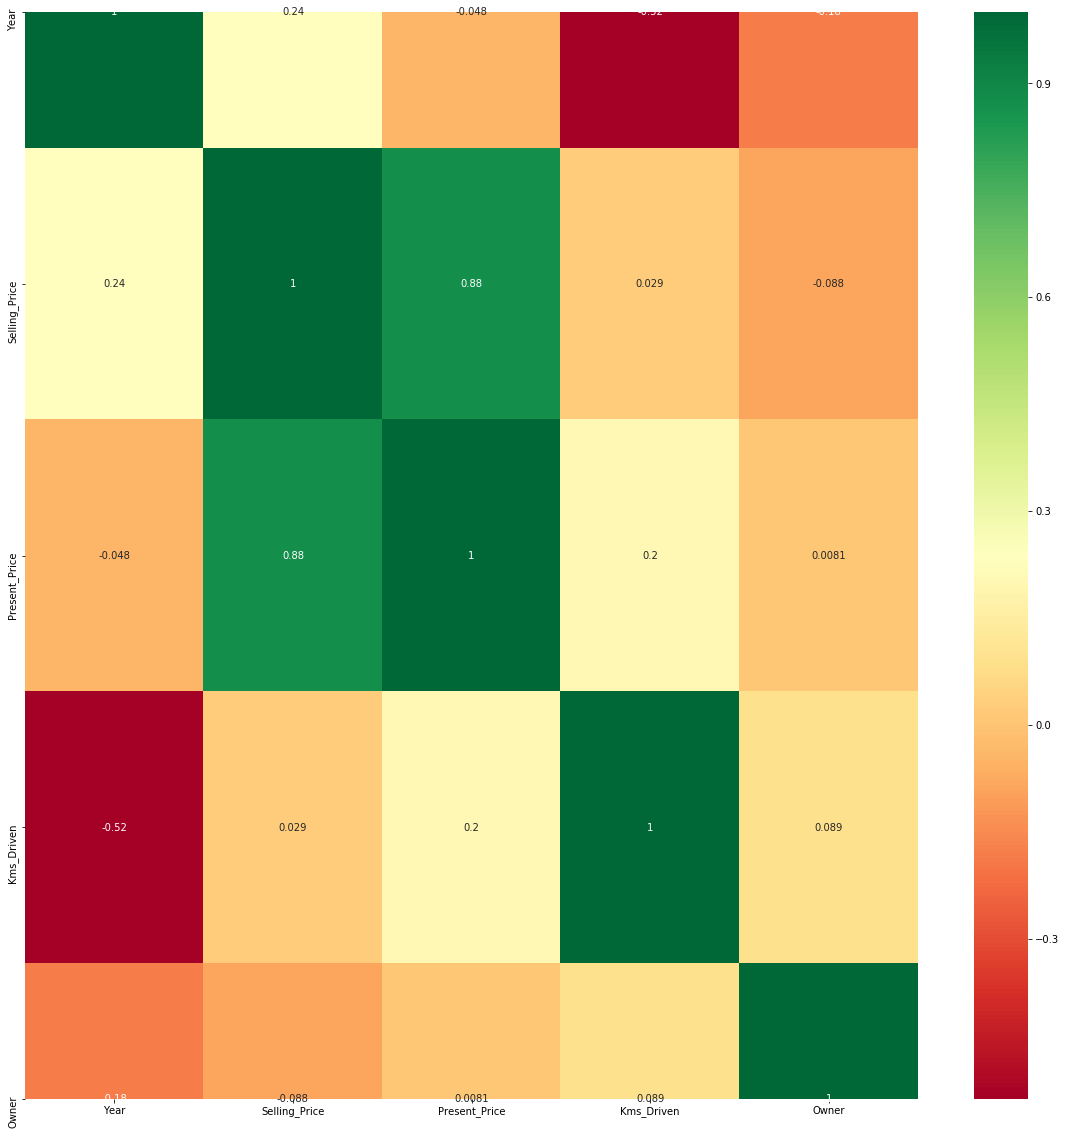

In [130]:

import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [131]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [132]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [133]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

# Feature Importance

In [135]:
#Feature Importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


In [136]:
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [137]:
print(model.feature_importances_)
print(type(model.feature_importances_))
print(X.columns)
print(type(X.columns))

[0.39578986 0.04299686 0.00047642 0.07478561 0.22180898 0.01477254
 0.1203802  0.12898953]
<class 'numpy.ndarray'>
Index(['Present_Price', 'Kms_Driven', 'Owner', 'no_year', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


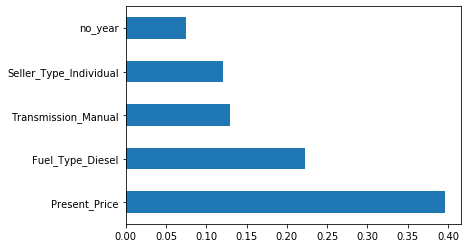

In [138]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [142]:
X_train.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
77,12.35,135154,0,16,0,1,0,0
20,3.95,25000,0,4,0,1,0,1
190,0.75,60000,0,12,0,1,1,1
253,9.90,48000,0,6,1,0,0,1
236,4.43,11849,0,4,0,1,0,1


In [143]:
# Decision tree and Random forrest doesnot need standard scaling 
from sklearn.ensemble import RandomForestRegressor
#rf_random= RandomForestRegressor()

In [147]:
#Hyperparameters tuning using Gridsearchcv and 5old cross validation
import numpy as np
n_estimators= [int(x) for x in np.linspace(100,1200,num=12) ]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [148]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [149]:
# Create the random grid using key value pair
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [150]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [151]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [152]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   29.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [161]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [159]:
predictions=rf_random.predict(X_test)

In [160]:
predictions

array([ 0.47628,  4.9301 ,  4.95145,  3.66023,  0.72137,  5.71966,
        5.3763 ,  9.39846,  8.99975,  0.63206,  6.45075, 19.58268,
        5.4757 ,  0.53008,  3.46645,  4.54685,  7.4132 ,  7.1166 ,
        7.17032,  3.1579 ,  0.92725,  2.64728,  0.36645, 10.86318,
        5.2302 ,  5.997  ,  5.02326, 10.85725,  0.63896,  4.22787,
        0.61966,  4.02199,  2.60882,  8.02505,  0.47745,  0.89795,
        3.28358,  7.08876,  7.1729 ,  6.01196,  4.60665,  2.91835,
        3.9567 ,  0.53743,  0.48169, 13.14819,  0.69368,  0.58386,
        1.38346,  8.26248, 11.74444,  0.45748,  5.86952,  0.76698,
        6.4552 ,  1.10338,  0.54468,  6.79316,  4.95785,  0.82394,
        6.66269])

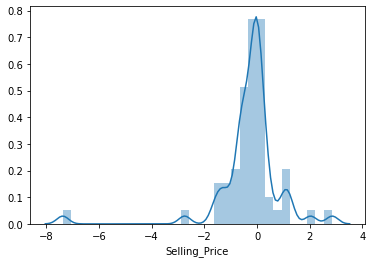

In [162]:
sns.distplot(y_test-predictions)
#Gausiian distributino graph:diff of MSE between actual and predicted is between -2 to 2

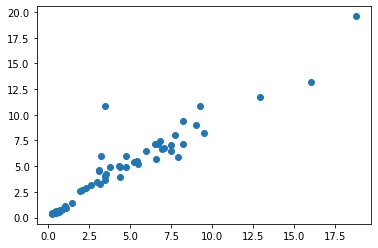

In [163]:
plt.scatter(y_test,predictions)

In [164]:
from sklearn import metrics

In [165]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.674008852459017
MSE: 1.5960405267836089
RMSE: 1.2633449753664312


In [167]:
import pickle
# open a file, where you ant to store the data
file=open("kushwanthreandomforrestregressor.pkl","wb")
# dump information to that file
pickle.dump(rf_random,file)

# Trying gridsearch cv

In [154]:
# Create the Gridsearchcv  using key value pair
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [157]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
#GridSearchCV
rf_Gridsearch = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='neg_mean_squared_error', cv = 5, verbose=2, n_jobs = 1)

In [158]:
#rf_Gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, 

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   1.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000, total=   1.7s
[CV] max_depth=5, max_features=auto, min_samples

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=600, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=900, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000, total=   1.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=1000, total=   1.6s
[CV] max_depth=5, max_features=auto, mi

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   1.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   1.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   1.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   2.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   1.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=600, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   1.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=900, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000, total=   2.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_sampl

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=600, total=   0.8s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900, total=   1.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900, total=   1.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=900, total=   1.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, total=   1.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=1000, total=   1.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, 

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=500, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=600, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=900, total=   1.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=900, total=   1.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_sampl

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=600, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=900, total=   2.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000, total=   1.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1000, total=   1.7s
[CV] max_depth=5, max_features=auto, mi

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600, total=   1.2s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900, total=   1.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900, total=   1.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1000, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_l

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=1200, total=   1.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=auto, min_s

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=800, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900, total=   1.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900, total=   1.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=900, total=   1.8s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=500, total=   0.8s
[CV] max_depth=5, max_features=aut

[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200, total=   1.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=1200, total=   2.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sq

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800, total=   1.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=900 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=900, total=   1.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   1.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1200, total=   2.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   1.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=   1.1s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=500, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200, total=   1.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200, total=   2.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200, total=   2.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1200, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=100, total=   0.2s
[CV] max_depth=5, max_features=sqrt, min_sa

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800, total=   1.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800, total=   1.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800, total=   1.2s
[CV] max_depth=5, max_features=sqrt, min_sa

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   0.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   0.6s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100, total=   1.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, total=   2.0s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=700, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800, total=   1.3s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

KeyboardInterrupt: 

In [168]:
!pip freeze requirements.txt  

absl-py==0.9.0
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
asn1crypto==1.0.1
astor==0.8.1
astroid==2.3.1
astropy==3.2.1
atomicwrites==1.3.0
attrs==19.2.0
awscli==1.18.13
Babel==2.7.0
backcall==0.1.0
backports.functools-lru-cache==1.6.1
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.8.0
bitarray==1.0.1
bkcharts==0.2
bleach==3.1.0
blis==0.4.1
bokeh==1.3.4
boto==2.49.0
boto3==1.13.24
botocore==1.16.24
Bottleneck==1.2.1
cachetools==4.1.0
catalogue==1.0.0
catboost==0.20.2
certifi==2019.9.11
cffi==1.12.3
chardet==3.0.4
chart-studio==1.1.0
Click==7.0
cloudpickle==1.2.2
clyent==1.2.2
colorama==0.4.1
colorlover==0.3.0
combo==0.1.0
comtypes==1.1.7
conda==4.8.4
conda-build==3.18.9
conda-package-handling==1.6.0
conda-verify==3.4.2
confuse==1.1.0
contextlib2==0.6.0
cryptography==2.7
cufflinks==0.17.0
cycler==0.10.0
cymem==2.0.3
Cython==0.29.13
cytoolz==0.10.0
dask==2

In [171]:
from flask import Flask, render_template, request
import jsonify
import requests
import pickle
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler